In [148]:
#
# By:          Will
#
# Description: visualizations for twitter data
#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import datetime as dt

%matplotlib inline

root = r'/project/rcc/deep_learning_hack/dc-taxi/DCTaxiCab/'

In [182]:
tweets = pd.read_csv(root + 'data/twitter/intermediate/tweets.csv')

In [183]:
tweets.created_at = pd.to_datetime(tweets.created_at)

In [184]:
tweets['date'] = tweets.created_at.apply(lambda x: x.replace(minute=0, second=0, microsecond=0))

In [185]:
tweets.columns

Index(['Unnamed: 0', 'favorite_count', 'source', 'text',
       'in_reply_to_screen_name', 'is_retweet', 'created_at', 'retweet_count',
       'id_str', 'tweet_source', 'trump', 'white house', 'washington',
       'washington post', 'kushner', 'flynn', 'conway', 'leak', 'preibus',
       'congress', 'russia', 'emails', 'hack', 'spicer', 'elliott', 'abrams',
       'tillerson', 'secretary', 'date'],
      dtype='object')

In [186]:
def visualize(df, idx):
    '''plot given a dataframe'''
    
    val_counts = pd.DataFrame(df.loc[idx, 'date'].value_counts()).reset_index()
    val_counts.columns = ['date', 'count']
    
    val_counts = val_counts[val_counts.date.dt.month == 2]
    
    val_counts.sort_values(by='date', inplace=True)
    
    val_counts.plot(x='date', y='count')
    
    plt.axvline(x=dt.datetime(2017, 2, 9, 18, 0, 0), color='black')
    
    ax = plt.gca()
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    return None

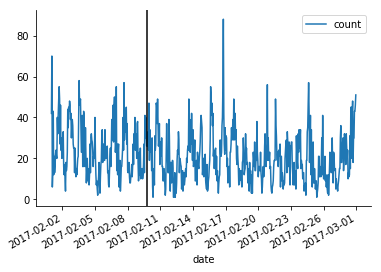

In [187]:
visualize(tweets, tweets.trump)

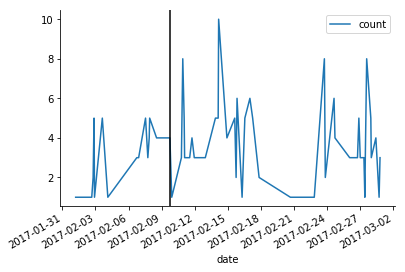

In [188]:
visualize(tweets, (tweets.source))

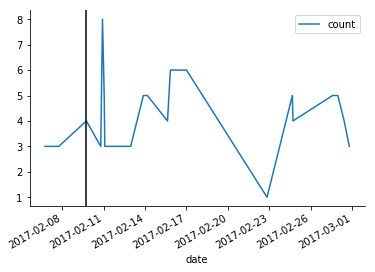

In [189]:
visualize(tweets, (tweets.source & tweets.trump))

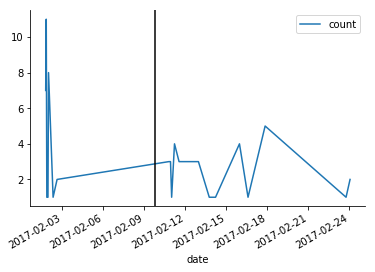

In [195]:
visualize(tweets, tweets.secretary & tweets.tillerson)

In [196]:
tweets.loc[tweets.source & tweets.trump & (tweets.date.dt.day == 10), ['date', 'text']]

,date,text
3856,2017-02-10 22:00:00,trump won't immediately appeal travel ban bloc...
5533,2017-02-10 22:00:00,trump dumped tillerson's deputy secretary of s...
6595,2017-02-10 22:00:00,trump won't immediately appeal travel ban bloc...
11993,2017-02-10 19:00:00,trump dumped tillerson's deputy secretary of s...
13539,2017-02-10 22:00:00,trump won't immediately appeal travel ban bloc...
14565,2017-02-10 22:00:00,trump dumped tillerson's deputy secretary of s...
15820,2017-02-10 22:00:00,trump won't immediately appeal travel ban bloc...
21717,2017-02-10 19:00:00,trump dumped tillerson's deputy secretary of s...
24128,2017-02-10 22:00:00,trump won't immediately appeal travel ban bloc...
28937,2017-02-10 22:00:00,trump dumped tillerson's deputy secretary of s...


In [198]:
tweets.loc[21717, 'text']

"trump dumped tillerson's deputy secretary of state pick over his criticisms during the campaign, sources say\x85 https://t.co/oj7jmvrufa"